In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def getFilepath(num):
    return "./dds_ch2_nyt/nyt" + str(num) + ".csv"

In [2]:

def AddAgeGroup(dataSet):
  bins = [-1,0,18,25,35,45,55,65,999]
  labels = [ "null", "<18", "18–24", "25–34", "35–44", "45–54", "55–64",  "65+"   ]

  dataSet['age_group'] = pd.cut(x=dataSet['Age'], bins=bins,
                    labels=labels)
  return dataSet


In [3]:
frames = []

for i in range(1,32):

  frames.append(pd.read_csv(getFilepath(i)))

data = pd.concat(frames)




In [4]:
data
data.isnull().sum()

Age            0
Gender         0
Impressions    0
Clicks         0
Signed_In      0
dtype: int64

In [5]:

data.isnull().sum()

AddAgeGroup(data)


,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,36,0,3,0,1,35–44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25–34
3,49,1,3,0,1,45–54
4,47,1,11,0,1,45–54
...,...,...,...,...,...,...
440107,41,1,4,0,1,35–44
440108,0,0,5,0,0,null
440109,22,1,3,0,1,18–24
440110,59,0,5,1,1,55–64


In [6]:

ctr = data.groupby(['age_group','Gender'], as_index=True).agg({'Clicks': sum, 'Impressions' : sum}).reset_index()#.iloc[2:]#.reset_index()

def getCTR(row):
  if row.Impressions != 0: 
    return row.Clicks / row.Impressions
  else:
    return 0

ctr['CTR'] = ctr.apply(getCTR , axis = 1)


#ctr.set_index("Gender", inplace=True)
#males = ctr.where(ctr['Gender'] == 0 ).dropna().set_index('age_group')['Clicks']
#females = ctr.where(ctr['Gender'] == 1 ).dropna().set_index('age_group')
#print(females.count()[0])
#males

ctr

,age_group,Gender,Clicks,Impressions,CTR
0,null,0,796448,28074662,0.028369
1,null,1,0,0,0.000000
2,<18,0,25810,1009067,0.025578
3,<18,1,48363,1779404,0.027179
4,18–24,0,26444,2640764,0.010014
5,18–24,1,29309,2934753,0.009987
6,25–34,0,40253,4007824,0.010044
7,25–34,1,44611,4455894,0.010012
8,35–44,0,48343,4810547,0.010049
9,35–44,1,53446,5356587,0.009978


In [7]:

def printBars(data, label):
  males = data.where(ctr['Gender'] == 1 ).dropna()[label]
  females = data.where(ctr['Gender'] == 0 ).dropna()[label]
  
  print(females.count())
  
  N = females.count()

  ind = np.arange(N) # the x locations for the groups
  width = 0.35       # the width of the bars

  fig, ax = plt.subplots()

  xtra_space = 0.05
  rects1 = ax.bar(ind, males, width, color='blue') 
  rects2 = ax.bar(ind + width , females, width, color='pink') 


  # add some text for labels, title and axes ticks
  ax.set_ylabel(label + " count")
  ax.set_title(label + " by age group and gender")

  ax.set_xticks(ind+width)
  ax.set_xticklabels( data['age_group'].unique() )

  plt.show()

8


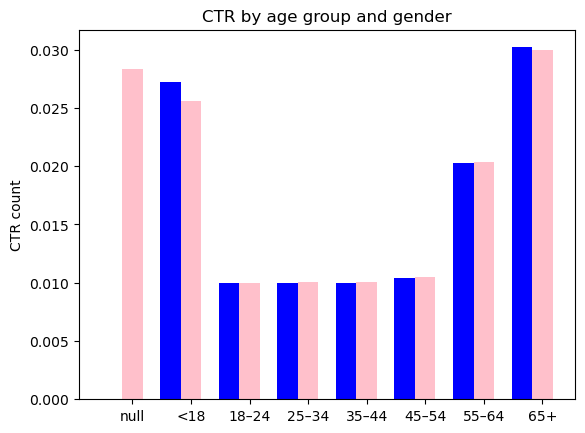

In [8]:
printBars(ctr,'CTR' )


8


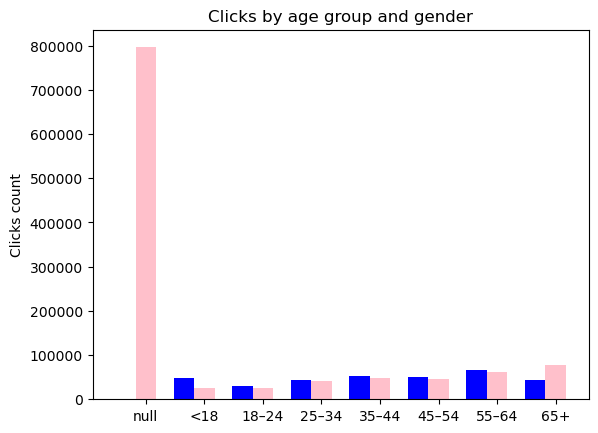

In [9]:
printBars(ctr,'Clicks' )

8


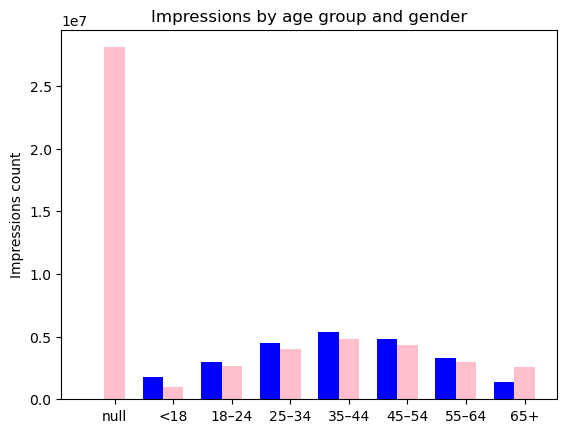

In [10]:
printBars(ctr,'Impressions' )